In [1]:
# from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

In [2]:
data = pd.read_csv('./Project_4_data/train.csv')

### Задание 1
Сколько записей содержит набор данных для моделирования?

In [3]:
data.shape[0]

73799

 **Посмотрим на данные:**
 
 |         |                     |
 |---------|---------------------|
 |client_id|идентификатор клиента|
 |education	|уровень образования|
 |sex	|пол заёмщика|
 |age	|возраст заёмщика|
 |car|	флаг наличия автомобиля|
 |car_type|	флаг автомобиля-иномарки|
 |decline_app_cnt|	количество отказанных прошлых заявок|
 |good_work|	флаг наличия «хорошей» работы|
 |bki_request_cnt|	количество запросов в БКИ|
 |home_address|	категоризатор домашнего адреса|
 |work_address|	категоризатор рабочего адреса|
 |income|	доход заёмщика|
 foreign_passport|	наличие загранпаспорта|
 |default|	наличие дефолта|

In [46]:
# удалим client_id идентификатор клиента
data.drop(columns='client_id',inplace=True)

### Задание 2
Постройте диаграмму для переменной `default`. Каких клиентов у банка больше?
- совершивших дефолт
- без дефолта

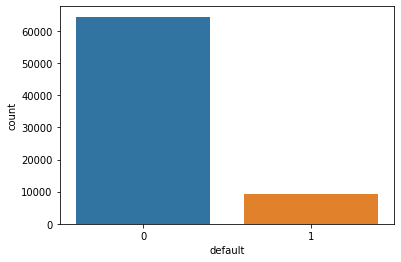

In [47]:
sns.countplot(x="default", data=data)

Посмотрим на тип данных и наличие пропусков:

In [48]:
data.info(verbose=False); print()

for col in data.columns: print('{:20} {}'.format(col, type(data.loc[0][col])))

data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Columns: 13 entries, education to default
dtypes: int64(8), object(5)
memory usage: 7.3+ MB

education            <class 'str'>
sex                  <class 'str'>
age                  <class 'numpy.int64'>
car                  <class 'str'>
car_type             <class 'str'>
decline_app_cnt      <class 'numpy.int64'>
good_work            <class 'numpy.int64'>
bki_request_cnt      <class 'numpy.int64'>
home_address         <class 'numpy.int64'>
work_address         <class 'numpy.int64'>
income               <class 'numpy.int64'>
foreign_passport     <class 'str'>
default              <class 'numpy.int64'>


education           0
sex                 0
age                 0
car                 0
car_type            0
decline_app_cnt     0
good_work           0
bki_request_cnt     0
home_address        0
work_address        0
income              0
foreign_passport    0
default             0
dtype: int64

В данных о клиентах присутствуют переменные всех типов, не все имеют числовую запись, а также есть пропущенные значения. Значит, нам необходима предварительная очистка данных.

Как мы видим, пропуски встречаются только в информации об образовании клиентов. Посмотрим на признак ближе:

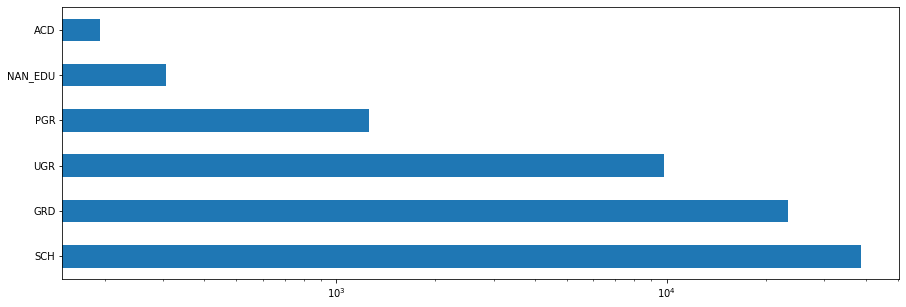

In [49]:
plt.figure(    figsize=(15,5))
data.education.value_counts().plot.barh()
plt.xscale("log")

### ЗАДАНИЕ

А теперь самостоятельно заполните пропуски в поле 'education' любыми известными вам методами.

In [50]:
# заполним пропуски 
data.education.fillna('NAN_EDU', inplace=True)

Полученные признаки сгруппируем в три категории по типу их обработки (категориальные, бинарные и числовые) для дальнейшего удобного анализа.

In [51]:
data.nunique().sort_values(ascending=False)

income              966
age                  52
bki_request_cnt      38
decline_app_cnt      21
education             6
work_address          3
home_address          3
default               2
foreign_passport      2
good_work             2
car_type              2
car                   2
sex                   2
dtype: int64

In [52]:
bin_cols = data.columns[data.nunique()==2]
cat_cols = data.columns[(data.nunique()>2) & (data.nunique()<7)] 
num_cols = data.columns[data.nunique()>6]

Посмотрим на распределение числовых данных:

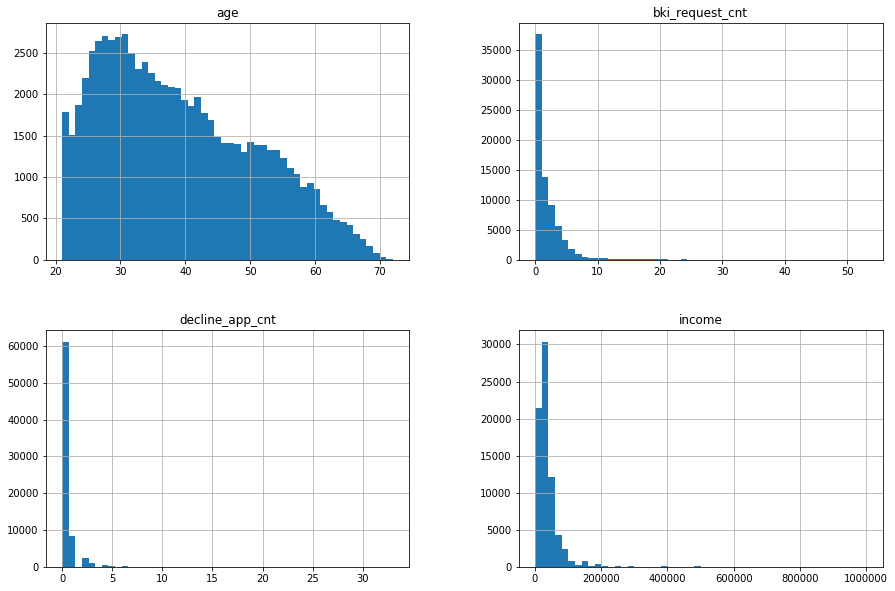

In [89]:
data[num_cols].hist(figsize=(15,10),bins = 50);

Построим графики распределения логарифмированных переменных.

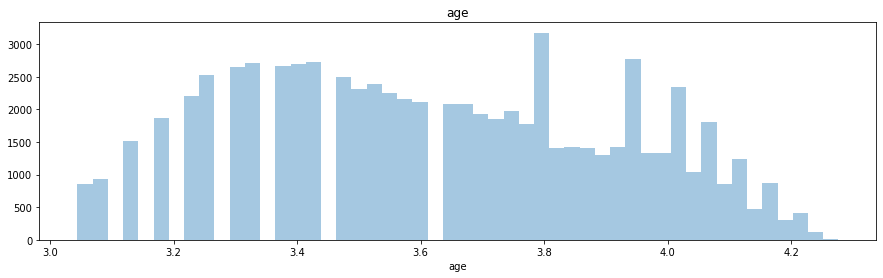

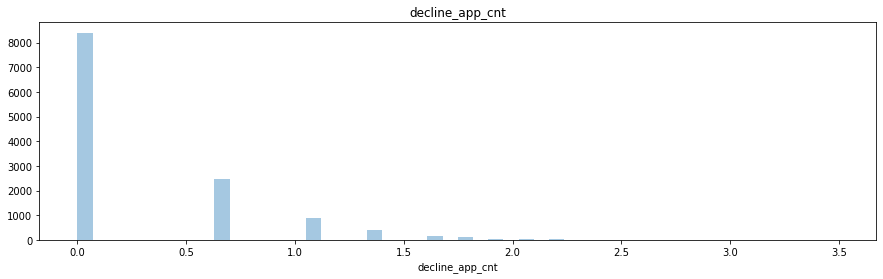

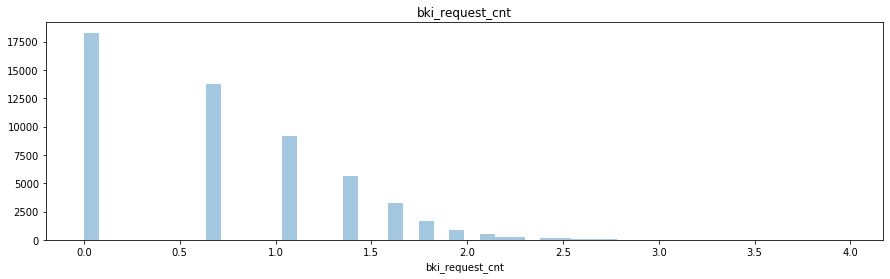

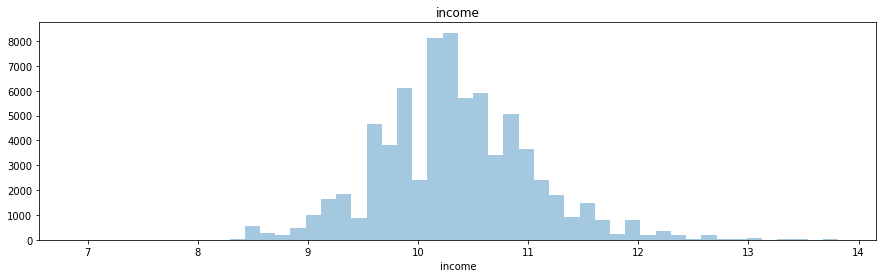

In [93]:
for i in num_cols:
    plt.figure(figsize=(15,4))
    sns.distplot(np.log(data[i][data[i] > 0].dropna()), kde = False, rug=False)
    plt.title(i)
    plt.show()

### Задание 1
Постройте boxplot’ы для численных переменных и ответьте на следующие вопросы:

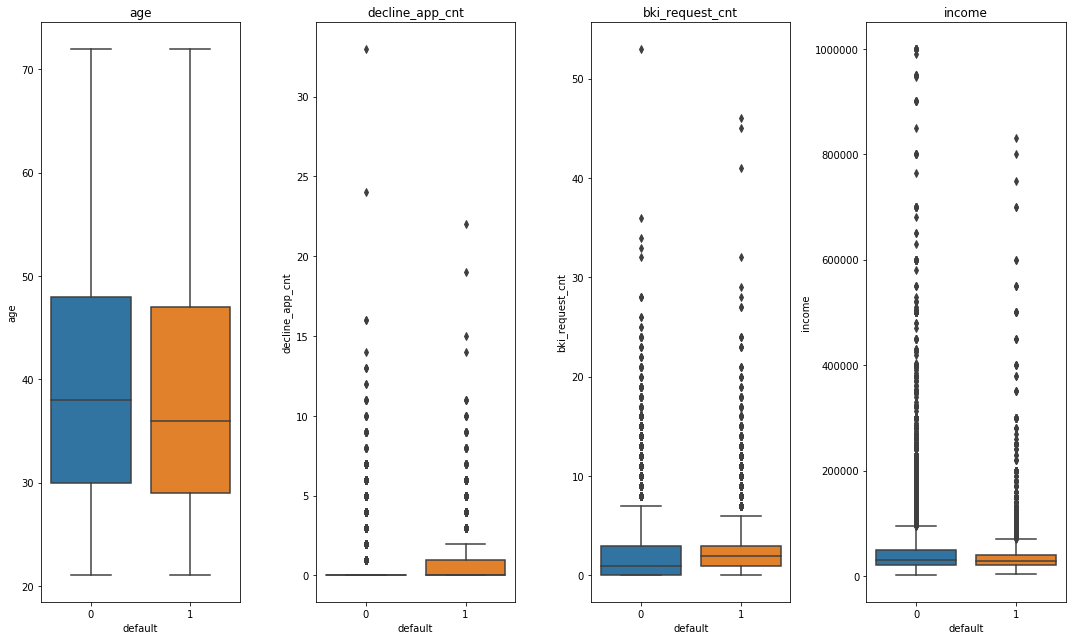

In [130]:
plt.figure(figsize=(15,9))

for i, column in enumerate(num_cols):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x='default',y=data[column],data=data)
    plt.title(column)

plt.tight_layout()

Оценим корреляцию Пирсона для непрерывных переменных по формуле:

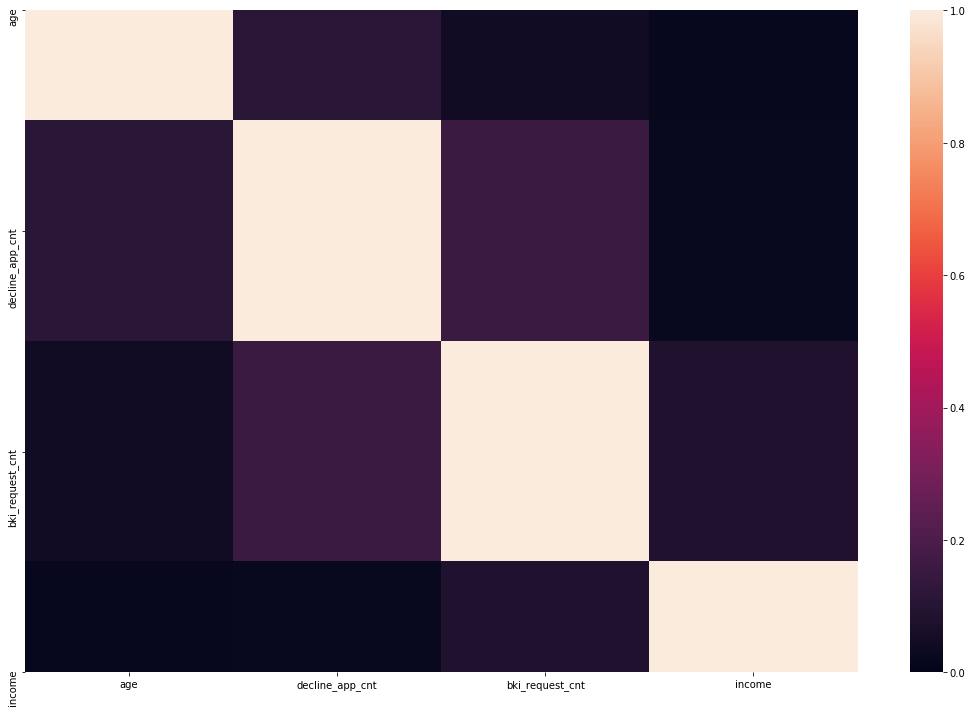

In [162]:
plt.figure(figsize=(15,10))
sns.heatmap(data[num_cols].corr().abs(), vmin=0, vmax=1,)
plt.tight_layout()
# , xticklabels=True, yticklabels=True

['age', 'decline_app_cnt', 'bki_request_cnt', 'income']